In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,LeakyReLU, AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input,Reshape,UpSampling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.models import model_from_json


Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
cd /content/drive/My Drive/ML Project/allDataInviscid/allDataInviscid/probing

/content/drive/My Drive/ML Project/allDataInviscid/allDataInviscid/probing


In [0]:
import glob

In [0]:
allCSV = np.asarray(glob.glob('*.csv'))
allCSV = np.sort(allCSV)
combined_csv = pd.concat([pd.read_csv(f) for f in allCSV ])



In [0]:
combined_csv.to_csv('combined_csv_inviscid.csv',index=False)

In [5]:
cd /content/drive/My Drive/ML Project/allDataRANS/allDataRANS/probing

/content/drive/My Drive/ML Project/allDataRANS/allDataRANS/probing


In [0]:
combined_csv = pd.read_csv("combined_csv_inviscid.csv")


In [0]:
combined_csv_RANS = pd.read_csv("combined_csv_RANS.csv")


In [0]:
allCSV_RANS = np.asarray(glob.glob('*.csv'))
allCSV_RANS = np.sort(allCSV_RANS)
combined_csv_RANS = pd.concat([pd.read_csv(f) for f in allCSV_RANS ])

In [0]:
combined_csv_RANS.to_csv('combined_csv_RANS.csv',index=False)

In [0]:
allUVP = combined_csv.copy()
allUVP = allUVP.drop(['U:2','vtkValidPointMask','arc_length','Points:0','Points:1','Points:2'], axis=1)

allU = allUVP.copy()
allU = allU.drop(['p','U:1'], axis=1)

allV = allUVP.copy()
allV = allV.drop(['p','U:0'], axis=1)

allP = allUVP.copy()
allP = allP.drop(['U:0','U:1'], axis=1)


In [0]:
allUVP_RANS = combined_csv_RANS.copy()
allUVP_RANS = allUVP_RANS.drop(['U:2','vtkValidPointMask','arc_length','Points:0','Points:1','Points:2'], axis=1)

allU_RANS = allUVP_RANS.copy()
allU_RANS = allU_RANS.drop(['p','U:1'], axis=1)

allV_RANS = allUVP_RANS.copy()
allV_RANS = allV_RANS.drop(['p','U:0'], axis=1)

allP_RANS = allUVP_RANS.copy()
allP_RANS = allP_RANS.drop(['U:0','U:1'], axis=1)

In [0]:
X_U = np.asarray(allU['U:0'])
X_U = X_U.reshape(2222,51,51,1)
X_U = np.nan_to_num(X_U)

X_V = np.asarray(allV['U:1'])
X_V = X_V.reshape(2222,51,51,1)
X_V = np.nan_to_num(X_V)

X_P = np.asarray(allP['p'])
X_P = X_P.reshape(2222,51,51,1)
X_P = np.nan_to_num(X_P, nan=9999)

In [0]:
Y_U = np.asarray(allU_RANS['U:0'])
Y_U = Y_U.reshape(2222,51,51,1)
Y_U = np.nan_to_num(Y_U)

Y_V = np.asarray(allV_RANS['U:1'])
Y_V = Y_V.reshape(2222,51,51,1)
Y_V = np.nan_to_num(Y_V)

Y_P = np.asarray(allP_RANS['p'])
Y_P = Y_P.reshape(2222,51,51,1)
Y_P = np.nan_to_num(Y_P, nan=9999)

In [17]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(4, 4), strides=(1, 1),
                 input_shape=(51,51,1),activation='relu'))
#model.add(LeakyReLU(alpha=1e-4))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Conv2D(4, (5, 5),activation='relu'))
#model.add(LeakyReLU(alpha=1e-4))
# model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
#model.add(LeakyReLU(alpha=1e-4))
model.add(Dense(2000,activation='relu'))
#model.add(LeakyReLU(alpha=1e-4))
model.add(Dense(2304))

model.add(Reshape((24,24,4),input_shape=(2304,)))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2DTranspose(1, (4, 4)))
#model.add(UpSampling2D(size=(2, 2)))
#model.add(Conv2DTranspose(1, (4, 4)))
for layer in model.layers:
    print(layer.output_shape)






(None, 48, 48, 4)
(None, 24, 24, 4)
(None, 2304)
(None, 2000)
(None, 2000)
(None, 2304)
(None, 24, 24, 4)
(None, 48, 48, 4)
(None, 51, 51, 1)


In [0]:
a = np.arange(2222)
np.random.shuffle(a)
trainNum = int(2222*0.80)
X_train, X_test = X_U[a[:trainNum],:,:], X_U[a[trainNum:],:,:]
Y_train, Y_test = Y_U[a[:trainNum],:,:], Y_U[a[trainNum:],:,:]

In [13]:

# load json and create model
json_file = open('CNN_model_ux.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("CNN_model_ux.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])











Loaded model from disk



In [20]:
# training

model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
          batch_size=50,
          epochs=1000,
          verbose=1,
          validation_data=(X_test, Y_test)
          )

# evaluating and printing results
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# serialize model to JSON
model_json = model.to_json()
with open("CNN_model_ux.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_ux.h5")
print("Saved model to disk")





Train on 1777 samples, validate on 445 samples
Epoch 1/1000





1777/1777 [==============================] - 13s 7ms/step - loss: 172.2952 - acc: 0.0033 - val_loss: 64.9482 - val_acc: 0.0066
Epoch 2/1000
1777/1777 [==============================] - 12s 7ms/step - loss: 41.7776 - acc: 0.0082 - val_loss: 20.6431 - val_acc: 0.0099
Epoch 3/1000
1777/1777 [==============================] - 11s 6ms/step - loss: 11.8772 - acc: 0.0098 - val_loss: 7.7332 - val_acc: 0.0084
Epoch 4/1000
1777/1777 [==============================] - 12s 7ms/step - loss: 6.8175 - acc: 0.0104 - val_loss: 6.3387 - val_acc: 0.0114
Epoch 5/1000
1777/1777 [==============================] - 12s 7ms/step - loss: 6.0504 - acc: 0.0111 - val_loss: 5.9226 - val_acc: 0.0106
Epoch 6/1000
1777/1777 [==============================] - 12s 7ms/step - loss: 5.5960 - acc: 0.0115 - val_loss: 5.6147 - val_acc: 0.0084
Epoch 7/1000
1777/1777 [==============================] - 12s 7ms/step - loss: 5.2507 - acc: 0.0111 - val_loss: 5.07

In [1]:
#score = model.evaluate(X_test, y_test, batch_size=50)
#print('Test Accuracy: {}'.format(score))
#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: ignored

In [0]:
# serialize model to JSON
model_json = loaded_model.to_json()
with open("CNN_model_ux.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights("CNN_model_ux.h5")
print("Saved model to disk")

NameError: ignored

In [0]:
model.predict(X_U[0,:,:,:].reshape(1,51,51,1)).shape


(1, 8464)

In [0]:
combined_csv_RANS_drop = combined_csv_RANS.drop(['U:2','vtkValidPointMask','arc_length','Points:2'], axis=1)
combined_csv_RANS_drop['case'] = [int(a) for a in combined_csv_RANS_drop.index.values/(51*51)]

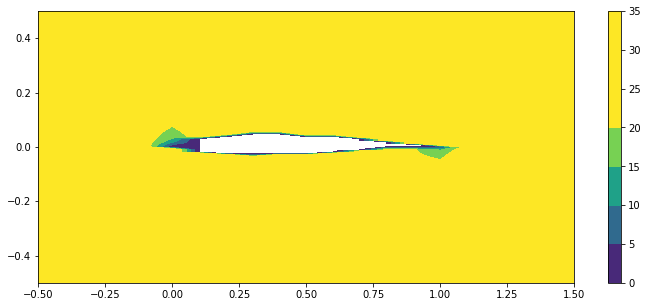

In [34]:
from matplotlib import cm
plt.rcParams["figure.figsize"] = [12,5]

fig = plt.figure()

ccx = combined_csv_RANS_drop[0:2601]['Points:0']
meshX = np.asarray(ccx).reshape(51,51)
ccy = combined_csv_RANS_drop[0:2601]['Points:1']
meshY = np.asarray(ccy).reshape(51,51)

meshU = np.asarray(X_U[125,:,:,:]).reshape(51,51)
cs = plt.contourf(meshX, meshY, meshU)
plt.colorbar()
#plt.axis('equal')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 0.5)
plt.clim(0,22)
plt.show()

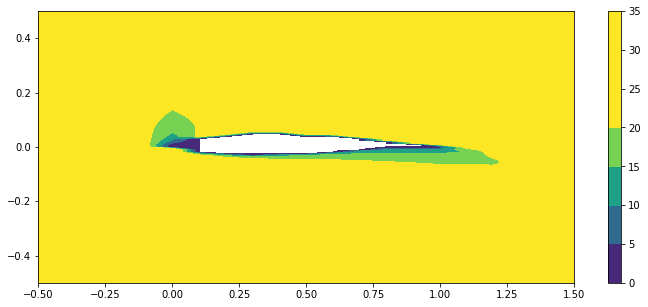

In [37]:
meshU = np.asarray(Y_U[125,:,:,:]).reshape(51,51)
cs = plt.contourf(meshX, meshY, meshU)
plt.colorbar()
#plt.axis('equal')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 0.5)
plt.clim(0,22)
plt.show()

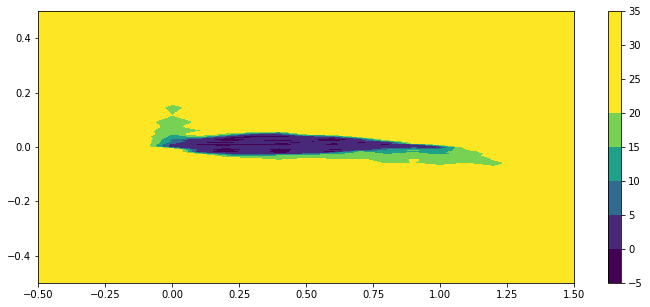

In [36]:
meshU = np.asarray(loaded_model.predict(X_U[125,:,:,:].reshape(1,51,51,1))).reshape(51,51)
cs = plt.contourf(meshX, meshY, meshU)
plt.colorbar()
#plt.axis('equal')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 0.5)
plt.clim(0,22)
plt.show()

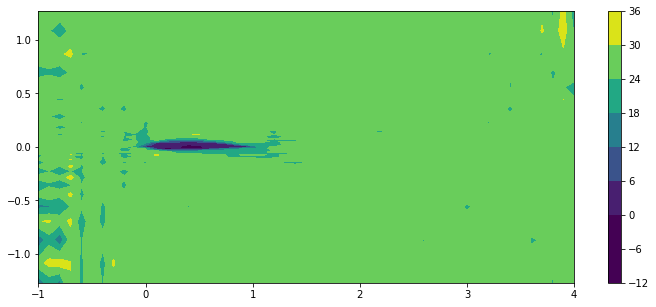

In [0]:

meshU = np.asarray(model.predict(X_U[125,:,:,:].reshape(1,51,51,1))).reshape(51,51)
cs = plt.contourf(meshX, meshY, meshU)
plt.colorbar()
plt.axis('equal')
plt.ylim(-0.1, 0.1)
plt.clim(0,35)
plt.show()

ValueError: ignored

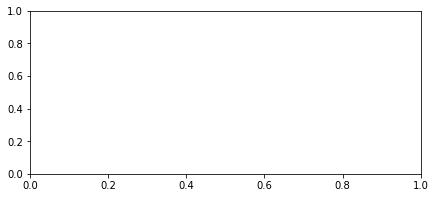

In [0]:
plt.rcParams["figure.figsize"] = [7,3]
plt.scatter(ccx,ccy,c=X_U[0,:,:,:])
plt.colorbar()